In [312]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

Data diambil dari akun github https://github.com/CSSEGISandData/COVID-19/tree/master/archived_data/archived_time_series yang bersumber dari Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE):
https://systems.jhu.edu/ 

In [313]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [314]:
cols = confirmed.columns[4:-1]
cols1 = [confirmed.columns[1]]
cols2 = np.concatenate((cols1,cols))
confirmed_date = confirmed[cols2]
deaths_date = deaths[cols2]
recovered_date = recovered[cols2]

## Jumlah kasus positif, meninggal, dan sembuh akibat Covid-19 di Dunia

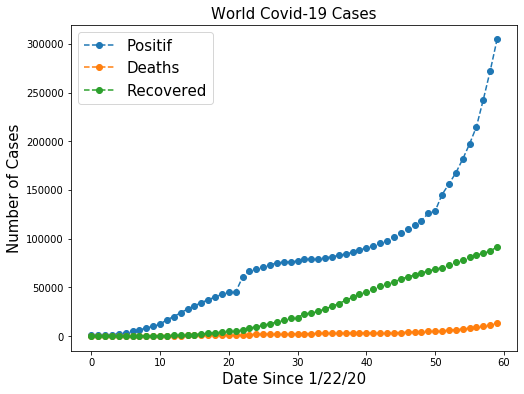

In [315]:
world_confirmed = np.array(confirmed_date.sum()[1:]).reshape(-1,1)
world_deaths = np.array(deaths_date.sum()[1:]).reshape(-1,1)
world_recovered = np.array(recovered_date.sum()[1:]).reshape(-1,1)
mortality_rate = world_deaths/world_confirmed
recovered_rate = world_recovered/world_confirmed
date_num = np.array([i for i in range(len(cols))]).reshape(-1,1)
plt.figure(figsize=(8,6))
plt.plot(date_num, world_confirmed, 'o--', label='Positif')
plt.plot(date_num, world_deaths, 'o--', label='Deaths')
plt.plot(date_num, world_recovered, 'o--', label='Recovered')
plt.xlabel('Date Since ' + cols[0], size=15)
plt.ylabel('Number of Cases', size=15)
plt.legend(loc='best', fontsize=15)
plt.title('World Covid-19 Cases', size=15)
plt.show()

## Laju kematian akibat Covid-19 di Dunia

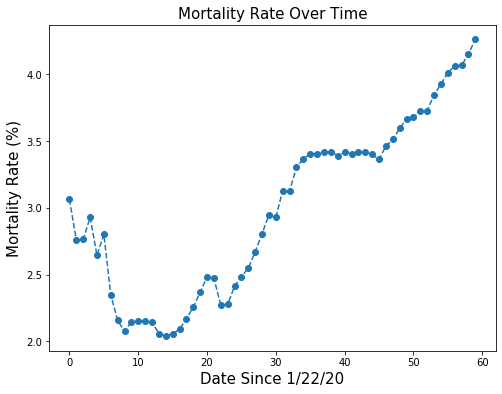

In [316]:
plt.figure(figsize=(8,6))
plt.plot(date_num, mortality_rate*100, 'o--')
plt.xlabel('Date Since ' + cols[0], size=15)
plt.ylabel('Mortality Rate (%)', size=15)
plt.title('Mortality Rate Over Time', size=15)
plt.show()

## Laju penderita Covid-19 yang sembuh di Dunia

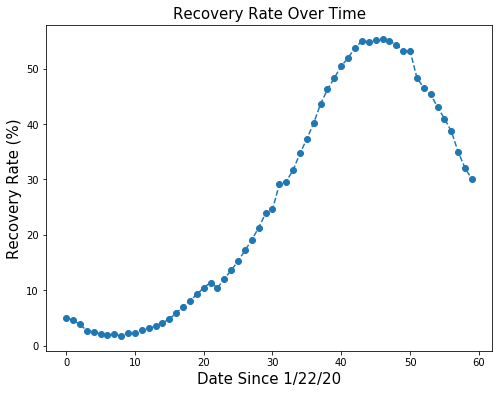

In [317]:
plt.figure(figsize=(8,6))
plt.plot(date_num, recovered_rate*100, 'o--')
plt.xlabel('Date Since ' + cols[0], size=15)
plt.ylabel('Recovery Rate (%)', size=15)
plt.title('Recovery Rate Over Time', size=15)
plt.show()

In [318]:
# confirmed_df[confirmed_df['Country/Region']=='China'].sum()[4:]
uniq_country = confirmed['Country/Region'].unique()
dates = confirmed.columns[4:]
first_detected = []
for country in uniq_country:
    cases = confirmed[confirmed['Country/Region']==country].sum()[4:]
    for i in range(len(cases)):
        if cases[i] > 0 :
            first_detected.append([country, dates[i]])
            break

data_first_detected = pd.DataFrame(first_detected, columns=['Country', 'date'])
data_first_detected['Country'] = data_first_detected['Country'] + ';'
data_first_detected = data_first_detected.groupby('date').sum()
data_first_detected.index = pd.to_datetime(data_first_detected.index)
data_first_detected = data_first_detected.sort_index()

## Tanggal awal terdeteksi Covid-19 di berbagai negara

In [319]:
count = []
sum_ = 0
for i in range(len(data_first_detected)):
    negara = data_first_detected['Country'][i].split(';')
    val = len(negara) - 1
    sum_ = sum_ + val
    count.append(sum_)
data_first_detected['Total_Country'] = count
data_first_detected

,Country,Total_Country
date,,
2020-01-22,"Thailand;Japan;US;China;Korea, South;Taiwan*;",6
2020-01-23,Singapore;Vietnam;,8
2020-01-24,France;,9
2020-01-25,Nepal;Malaysia;,11
2020-01-26,Canada;Australia;,13
2020-01-27,Cambodia;Sri Lanka;Germany;,16
2020-01-29,Finland;United Arab Emirates;,18
2020-01-30,Philippines;India;,20
2020-01-31,Italy;Sweden;Russia;United Kingdom;,24


## Jumlah negara yang tersebar covid-19

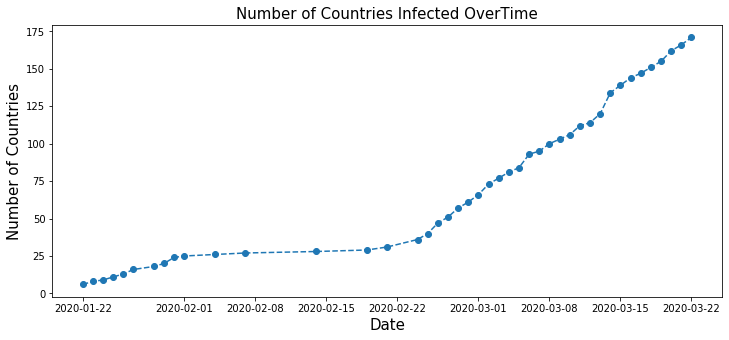

In [320]:
plt.figure(figsize=(12,5))
plt.plot(data_first_detected.index, data_first_detected['Total_Country'], 'o--')
plt.xlabel('Date', size=15)
plt.ylabel('Number of Countries', size=15)
plt.title('Number of Countries Infected OverTime', size=15)
plt.show()

### Berdasarkan laju kematian Sudan, Gabon, Guyana menempati peringkat atas. Namun negara tersebut masih memiliki jumlah kasus yang sedikit. Indonesia juga berada dalam peringkat yang cukup tinggi di atas rata-rata dunia.

In [321]:
grouped_confirmed = confirmed.groupby('Country/Region').sum()
grouped_deaths = deaths.groupby('Country/Region').sum()
grouped_recovery = recovered.groupby('Country/Region').sum()
current_day = cols[-1]
final  = pd.DataFrame(grouped_confirmed[current_day])
final = pd.concat([final, grouped_deaths[current_day], grouped_recovery[current_day]], axis=1)
final.columns = ['Confirmed', 'Deaths', 'Recovery']
final['Deaths_Rate'] = final['Deaths']/final['Confirmed']
final['Recovery_Rate'] = final['Recovery']/final['Confirmed']
final.sort_values(by=['Confirmed'], ascending=False)[:40]

,Confirmed,Deaths,Recovery,Deaths_Rate,Recovery_Rate
Country/Region,,,,,
China,81305,3259,71857,0.040084,0.883796
Italy,53578,4825,6072,0.090056,0.113330
US,25489,307,0,0.012044,0.000000
Spain,25374,1375,2125,0.054189,0.083747
Germany,22213,84,233,0.003782,0.010489
Iran,20610,1556,7635,0.075497,0.370451
France,14431,562,12,0.038944,0.000832
"Korea, South",8799,102,1540,0.011592,0.175020
Switzerland,6575,75,15,0.011407,0.002281


## Plot grafik jumlah kasus, meninggal dan sembuh dibeberapa negara

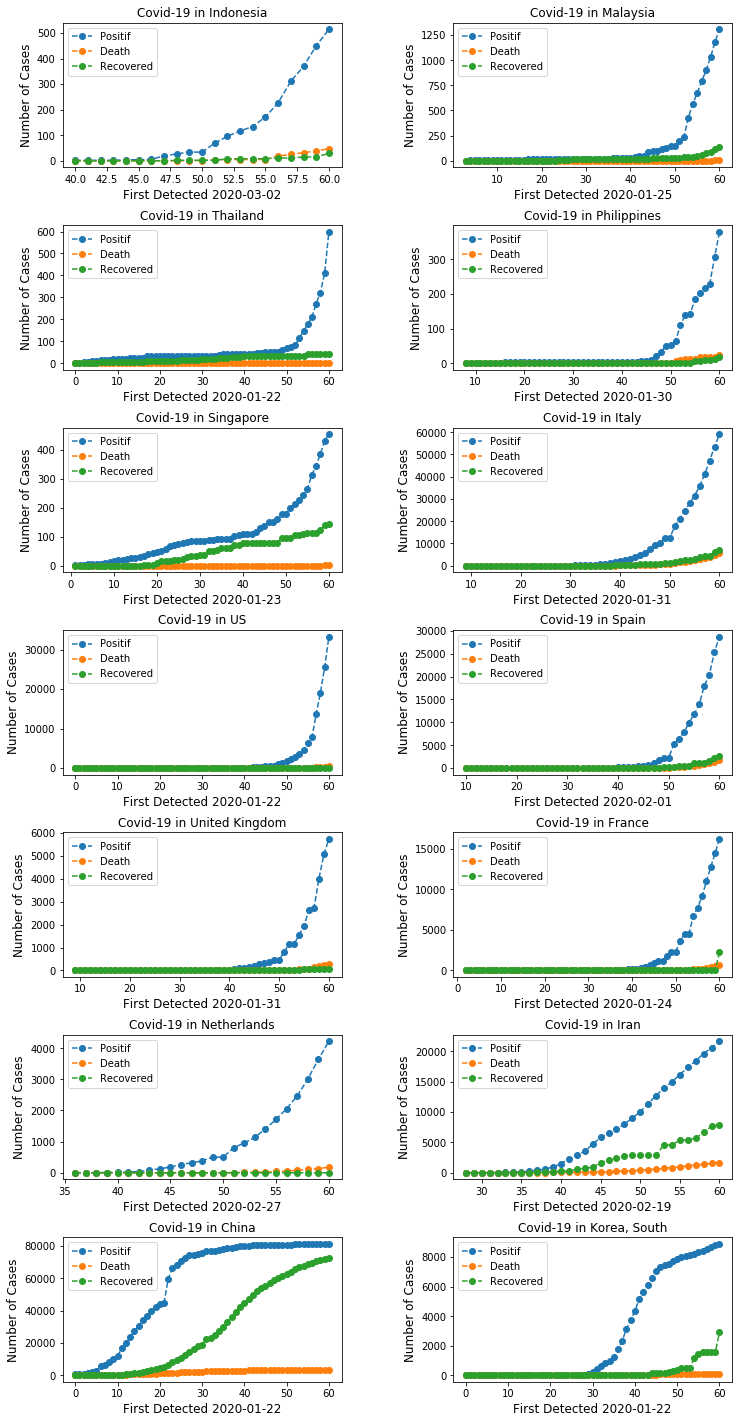

In [326]:
data_first_detected = pd.DataFrame(first_detected, columns=['Country', 'Date'])
negara = ['Indonesia', 'Malaysia', 'Thailand', 'Philippines', 'Singapore','Italy','US','Spain','United Kingdom','France','Netherlands', 'Iran', 'China', 'Korea, South']
plt.figure(figsize=(12,25))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(negara)):
    plt.subplot(len(negara)/2,2,1+i)
    data_first_detected['Date'] = pd.to_datetime(data_first_detected['Date'])
    data_first_detected['Date_num'] = (data_first_detected['Date'] - data_first_detected['Date'][0] ).dt.days
    x_start = int(data_first_detected[data_first_detected['Country']== negara[i]]['Date_num'])
    IND_confirmed = grouped_confirmed[grouped_confirmed.index==negara[i]].T[2:]
    IND_deaths = grouped_deaths[grouped_deaths.index==negara[i]].T[2:]
    IND_recovery = grouped_recovery[grouped_recovery.index==negara[i]].T[2:]
    x_dates = np.array([i for i in range(x_start, len(dates))]).reshape(-1,1)
    plt.plot(x_dates, IND_confirmed[x_start:], 'o--', label='Positif')
    plt.plot(x_dates, IND_deaths[x_start:], 'o--', label='Death')
    plt.plot(x_dates, IND_recovery[x_start:], 'o--', label='Recovered')
    plt.legend(loc='best')
    label = data_first_detected['Date'][data_first_detected['Date_num'] == x_start]
    label = str(label.unique())[2:12]
    plt.xlabel("First Detected " + label, size=12)
    plt.ylabel("Number of Cases", size=12)
    plt.title("Covid-19 in " + negara[i])

## Plot laju penambahan kasus covid-19 di berbagai negara. Terlihat China dan Korea Selatan mulai mengalami perlambatan pertumbuhan jumlah kasus.

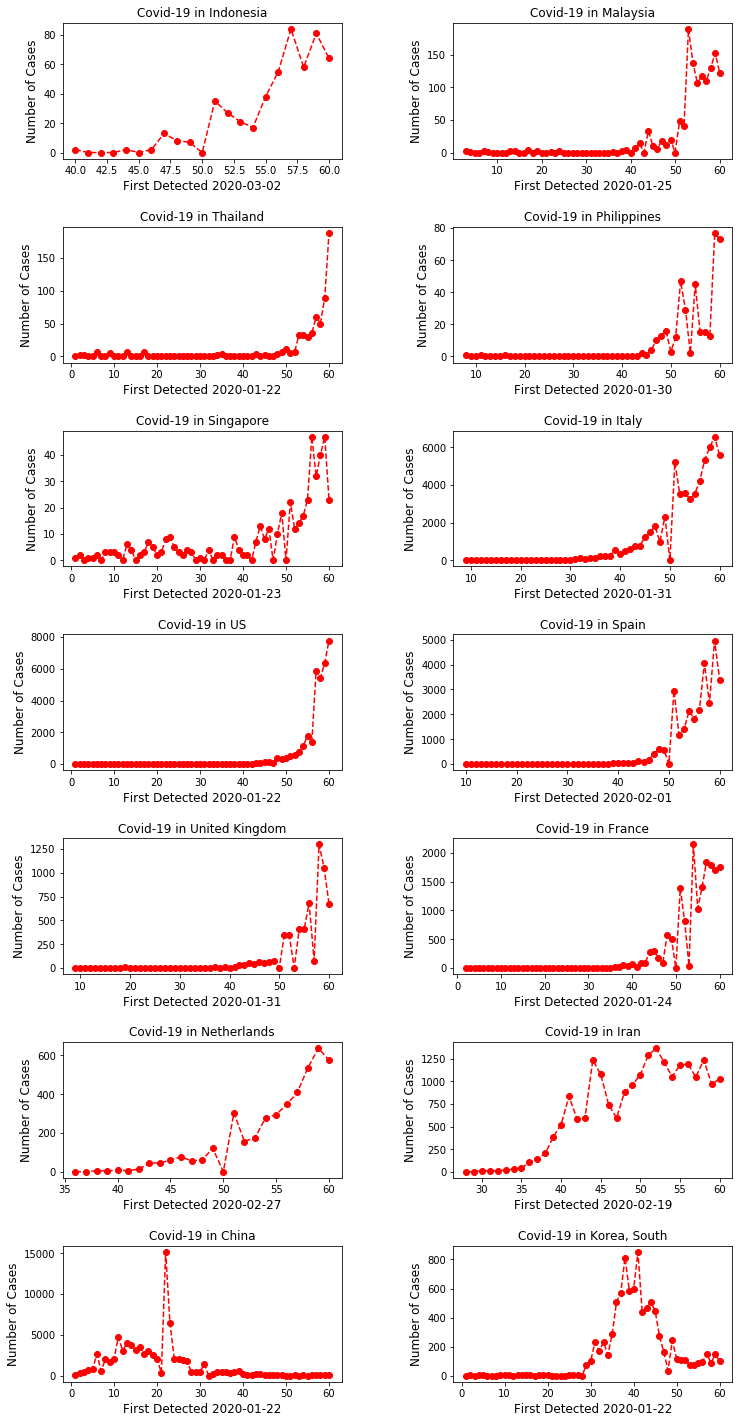

In [334]:
plt.figure(figsize=(12,25))
plt.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(len(negara)):
    plt.subplot(len(negara)/2,2,1+i)
    data_first_detected['Date'] = pd.to_datetime(data_first_detected['Date'])
    data_first_detected['Date_num'] = (data_first_detected['Date'] - data_first_detected['Date'][0] ).dt.days
    x_start = int(data_first_detected[data_first_detected['Country']== negara[i]]['Date_num'])
    IND_confirmed = grouped_confirmed[grouped_confirmed.index==negara[i]].T[2:]
    IND_confirmed_diff = IND_confirmed.diff()
    x_dates = np.array([i for i in range(x_start, len(dates))]).reshape(-1,1)
    plt.plot(x_dates, IND_confirmed_diff[x_start:], 'o--', color='red')
    label = data_first_detected['Date'][data_first_detected['Date_num'] == x_start]
    label = str(label.unique())[2:12]
    plt.xlabel("First Detected " + label, size=12)
    plt.ylabel("Number of Cases", size=12)
    plt.title("Covid-19 in " + negara[i])

## Plot laju kematian covid-19 di beberapa negara

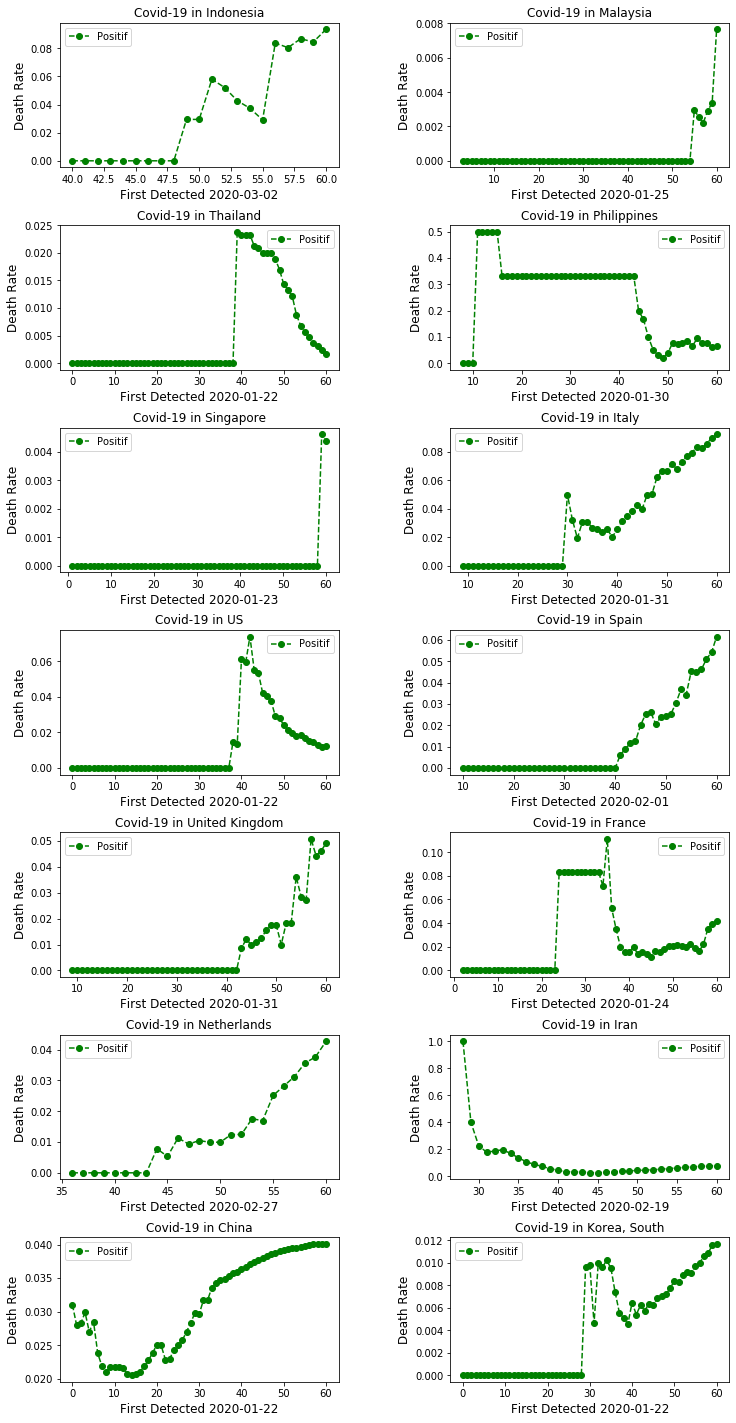

In [335]:
plt.figure(figsize=(12,25))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(len(negara)):
    plt.subplot(len(negara)/2,2,1+i)
    data_first_detected['Date'] = pd.to_datetime(data_first_detected['Date'])
    data_first_detected['Date_num'] = (data_first_detected['Date'] - data_first_detected['Date'][0] ).dt.days
    x_start = int(data_first_detected[data_first_detected['Country']== negara[i]]['Date_num'])
    IND_confirmed = grouped_confirmed[grouped_confirmed.index==negara[i]].T[2:]
    IND_deaths = grouped_deaths[grouped_deaths.index==negara[i]].T[2:]
    deaths_rate = IND_deaths/IND_confirmed
    x_dates = np.array([i for i in range(x_start, len(dates))]).reshape(-1,1)
    plt.plot(x_dates, deaths_rate[x_start:], 'o--',color='green', label='Positif')
    plt.legend(loc='best')
    label = data_first_detected['Date'][data_first_detected['Date_num'] == x_start]
    label = str(label.unique())[2:12]
    plt.xlabel("First Detected " + label, size=12)
    plt.ylabel("Death Rate", size=12)
    plt.title("Covid-19 in " + negara[i])